<a href="https://colab.research.google.com/github/Falguni2511/bharat_intern/blob/main/Stock_price_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
import torch
import torch.nn as nn



In [4]:
df= pd.read_csv("/content/drive/MyDrive/netflix.csv")
closed_prices = df["Close"]


In [5]:
seq_len = 15

In [6]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()



In [7]:
X=[]
Y=[]

In [8]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [9]:

X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [10]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [11]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])


In [12]:
model = Model(1,64)

In [13]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)


In [14]:
loss_fn = nn.MSELoss()

In [15]:
num_epochs=100

In [16]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 0.0062015085
20 epoch loss 0.004906232
30 epoch loss 0.0043905987
40 epoch loss 0.003921708
50 epoch loss 0.0031350218
60 epoch loss 0.0015299614
70 epoch loss 0.00052336365
80 epoch loss 0.00015727656
90 epoch loss 4.825867e-05


In [18]:
pred = mm.inverse_transform(output.detach().numpy())
real = mm.inverse_transform(test_y.detach().numpy())

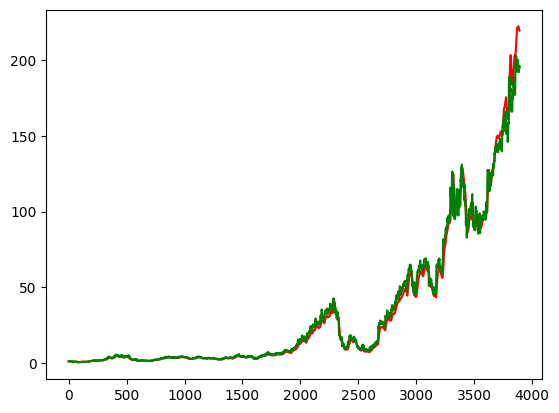

In [19]:
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()